In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from pathlib import Path
import sys

root = str(Path().resolve().parent)
if root not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


In [2]:
from importlib import reload
from rfdsppy import calc, ofdm, rf_analog, rf_tx_fw

reload(calc)
reload(ofdm)
reload(rf_analog)
reload(rf_tx_fw)

<module 'rfdsppy.rf_tx_fw' from '/home/ryanwtsai/repos/rfdsp_sim/python/rfdsppy/rf_tx_fw.py'>

EVM: 0.72%
SNR: 42.88688806056648


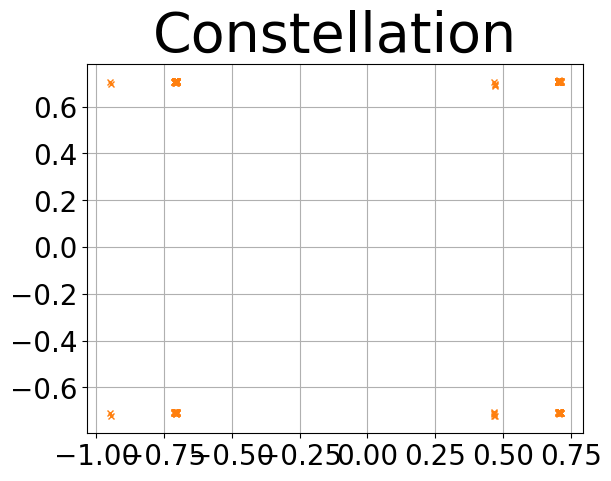

In [16]:
modorder = 4
bw = 20
scs = 15
num_sc = 1200
start_sc = 600-round(num_sc/2)
en_tprecode = False
osr = 4
wola = 1
wg = ofdm.OFDMWavGen(bw, scs, modorder, start_sc, num_sc=num_sc, en_tprecode=en_tprecode, osr=osr, wola=wola, power=-30)
cfg = wg.get_demod_params()
fs = cfg.get("fs")

x, x_standard = wg.generate(14)
y = x*np.exp(1j*(scs/1000/2**10)*2*np.pi/fs*np.arange(x.size))

evm = wg.calculate_evm(x_standard, y[round(cfg["wola_len"]/2):]-y.mean(), en_plot=True, en_fd_eq=False)
print(f"EVM: {evm.round(2)}%")
print(f"SNR: {-20*np.log10(evm/100)}")